# K-MEANS PROJECT


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
raw_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
raw_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
raw_data.shape

(20640, 9)

#### removing unuseful variables

In [4]:
total_data = raw_data[["MedInc", "Latitude", "Longitude"]]
total_data.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


#### train and test data division

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(total_data, test_size = 0.2, random_state = 42)

X_train.head()

,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


# K-MEANS MODEL

In [6]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 6, random_state = 42)
model.fit(X_train)

KMeans(n_clusters=6, random_state=42)

#### insert clasification clusters in total_data

In [7]:
y_train = list(model.labels_)
X_train["cluster"] = y_train
X_train['cluster'].value_counts()

cluster
3    4368
5    4356
1    3807
0    2455
2    1280
4     246
Name: count, dtype: int64

#### SCATTERPLOT OF THE RESULTS

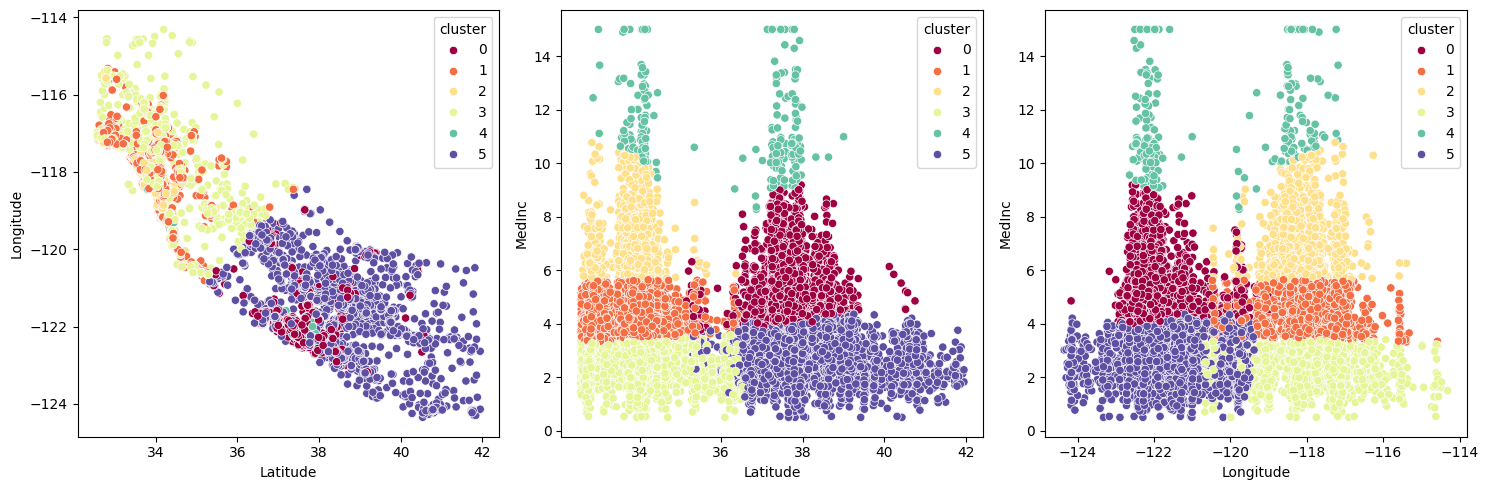

In [8]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "Spectral")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "Spectral")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "Spectral")
plt.tight_layout()

plt.show()

* "MedInc" relationship with "latitude" and "longitude" are very similar. We can observe the different clusters very easily.
* In other point, "latitude" and "longitude" relationship is more concentrated in what seems to be a set of clusters that are differentiated in two larger clusters

# PREDICT WITH THE TEST DATA

In [9]:
y_test = list(model.predict(X_test))
X_test["cluster"] = y_test
X_test.head()

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


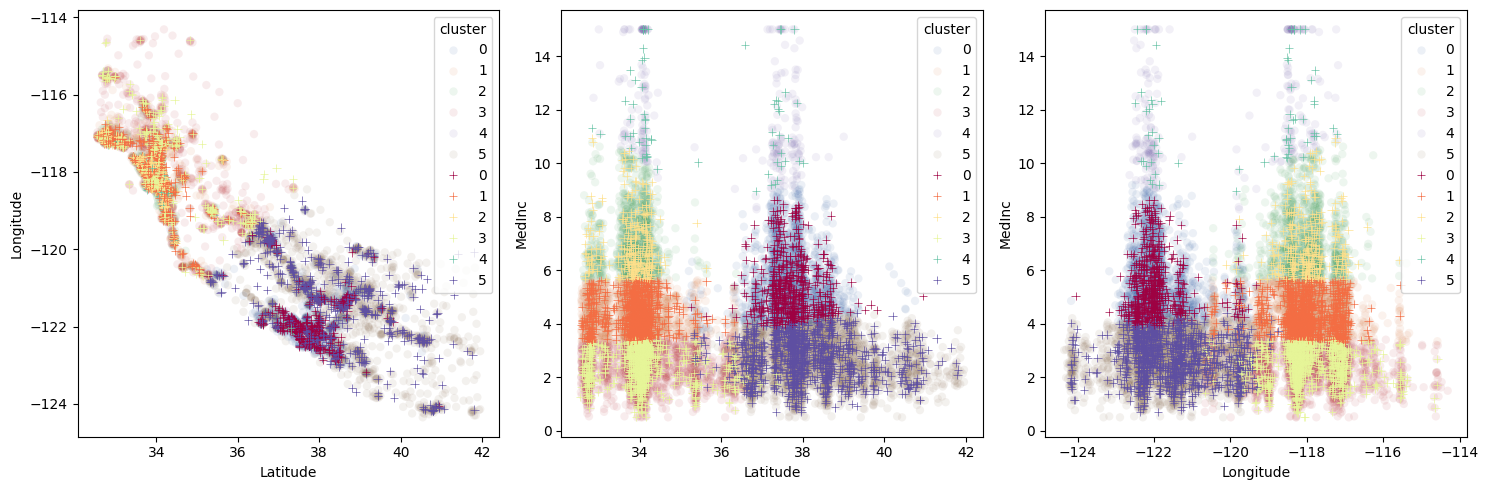

In [10]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)

sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "Longitude", hue = "cluster", palette = "Spectral", marker = "+")
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "MedInc", hue = "cluster", palette = "Spectral", marker = "+")
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "cluster", palette = "Spectral", marker = "+")

plt.tight_layout()


plt.show()

The prediction graphically looks favorable as the prediction points mostly appear to be concentrated in the zones of the training set data.

# TRAIN A SUPERVISED CLASSIFICATION MODEL

DECISSION TREE CLASSFIER

In [11]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(random_state = 42)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

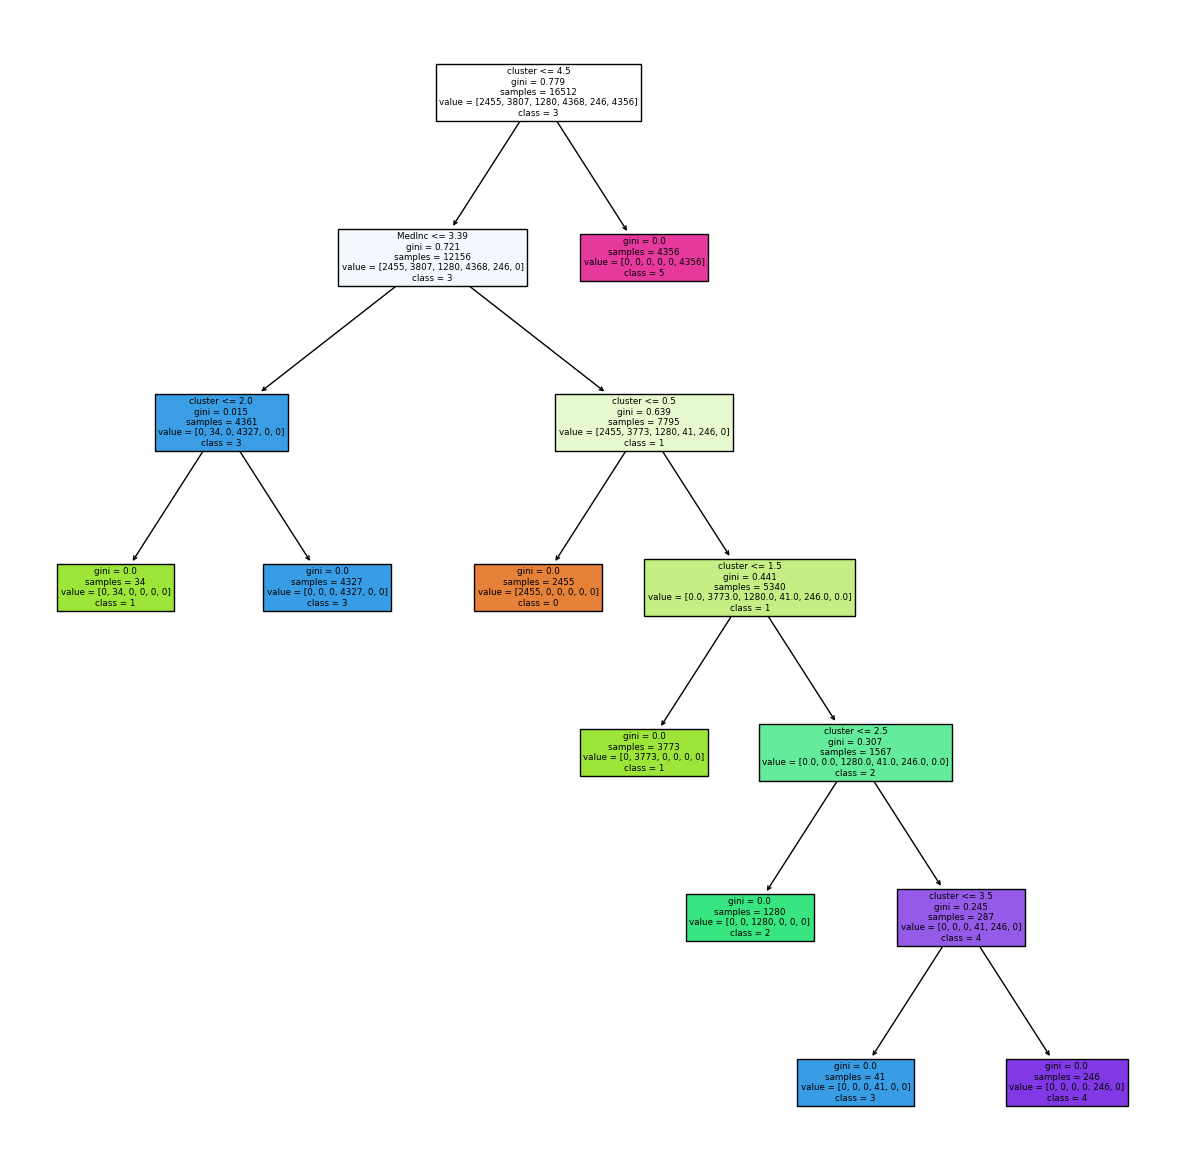

In [12]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model_tree, feature_names = list(X_train.columns), class_names = ["0", "1", "2", "3", "4", "5"], filled = True)

plt.show()

#### Decision tree model metrics

In [13]:
y_pred = model_tree.predict(X_test)
y_pred

array([3, 3, 5, ..., 4, 5, 1], dtype=int32)

In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

## Now we have a perfect model

## Saving the models

In [15]:
from pickle import dump

dump(model, open("/workspaces/unsupervised-learning-fertr98/models/K-means_randomseed42.sav", "wb"))
dump(model_tree, open("/workspaces/unsupervised-learning-fertr98/models/decission_tree_classifier.sav", "wb"))